## Merge Interval 

Read `/review/tech_interviews/merge-interval.ipynb` to see today's pattern.

Given an array of intervals where intervals[i] = [starti, endi], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

Submit here: https://leetcode.com/problems/merge-intervals/ 

## Inferential Analytics

Analytics is simply the act of using mathematics to describe a dataset.
So far we’ve been creating inferential analytics (gathering information on our dataset)
* Central tendency (mean, median, mode)
* K-S Test
* Histograms 
* QQ-Plots 
* Unique feature engineering 
* Box-plots

In [3]:
import pandas as pd
import seaborn as sns

# read in property csv file
df = pd.read_csv("../data/train.csv")

In [4]:
# focus in on columns "MSZoning" & "SaleCondition" and drop nulls
df.dropna(subset=["MSZoning", "SaleCondition"], inplace=True)
df.shape

(1460, 81)

In [5]:
# filter low-residential normal sale houses
df_rl = df[(df["MSZoning"] == "RL") & (df["SaleCondition"] == "Normal")]

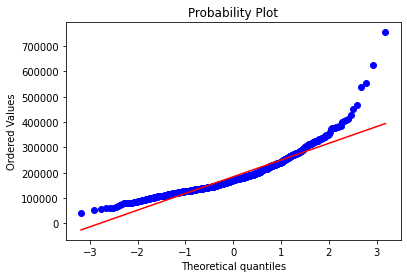

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_rl["SalePrice"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

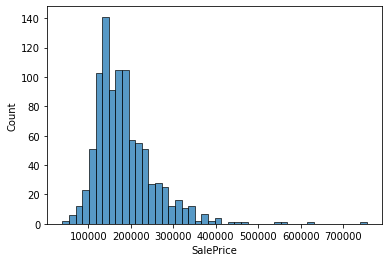

In [7]:
sns.histplot(df_rl["SalePrice"])

In [10]:
# erratum : we must specify the mean and std of the dataset for the ks-test to work `args=(mean, std)`

stats.kstest(df_rl["SalePrice"], stats.norm.cdf, args=(df_rl["SalePrice"].mean(), df_rl["SalePrice"].std()))

KstestResult(statistic=0.11445148932150595, pvalue=2.358752723454037e-11)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

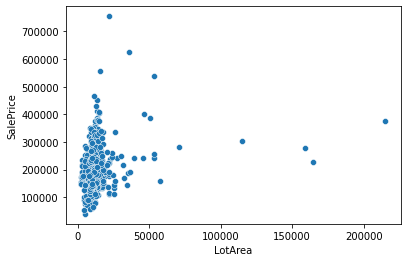

In [7]:
sns.scatterplot(data = df_rl, x = "LotArea", y = "SalePrice")

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

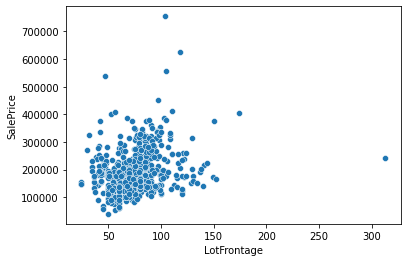

In [8]:
# complete this code to reveal the relationship between `LotFrontage` & `SalePrice`
sns.scatterplot(data = df_rl, x = "", y = "")

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

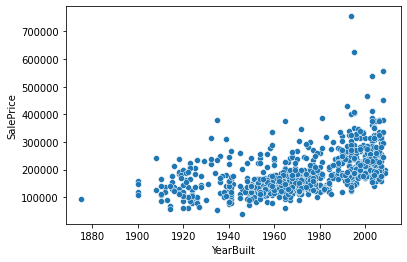

In [9]:
# complete this code to reveal the relationship between `YearBuilt` & `SalePrice`
sns.scatterplot(data = df_rl,)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

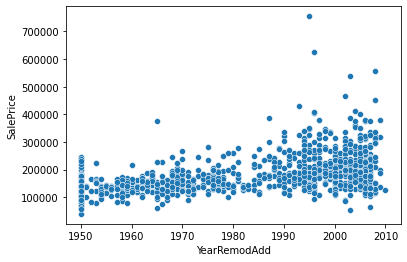

In [10]:
# write code to reveal the relationship between `YearRemodAdd` & `SalePrice` via a scatter-plot


## Predictive Analytics

We now want to utilize the insight gained from informative analytics to PREDICTIVE ANALYTICS 
* Predict future data using historical data
* This is also known as machine-learning, statistical-learning, model-fitting, etc
* Could be considered part of AI
* In reality, it’s just a bunch of calculus, linear algebra, & algorithms that we iteratively apply on a dataset until we get an answer that looks right

## Predictive Models

We assume that each dataset has a model (something that tells us how this phenomenon is arranged)
* Clustered groups : Different types of Amazon shoppers according to age, interests, etc.
* Linear regression : Relationship between temperature and ice cream sales
* Polynomial regression : Relationship b/w free-time & age
* Logistic model : Classifying dog vs. not-dog

All these models are wrong. Some are less wrong than others.


## Types of Models

In machine learning (predictive analytics), we have two different types of problems:
* Supervised models: “answers” are labeled, we are attempting to find a model that predicts answers (all models discussed today are supervised models)
* Unsupervised models: “answers” are unlabeled, we are attempting to find a model that describes structure 

## Linear Regression 

The only video that has done proper justice to explaining linear regression is the following: https://www.youtube.com/watch?v=kHwlB_j7Hkc 

Please do watch.

The process of linear regression entails fitting a model that describes the relationship of your data. This model is:
* Supervised

Regression indicates that we are predicting a continuous value. The alternative to regression is classification, which we will see next week.

This model, to begin with, is a simple linear equation that we learned back in middle school. `y=mx+b`

For this machine learning task, we will consider our slope & y-intercept to be unknown parameters that we must solve for in order to minimize error between our data-points & the model we create!

In tandem with learning about this model, we will continue analyzing normal-sale low-residential homes. 

Before we begin analyzing the relationship between price & house-features (Year, LotFrontage, LotArea), let’s make scatter-plots to check if there is an obvious relationship between one of these variables.

To begin, we will ONLY analyze continuous quantitative independent variables. 

## Types of Data

* Categorical:
	Categories that have no intrinsic value (ex: house-color)

* Quantitative:
    * Discrete Quantitative: Numbers that have value, but also fall into categories (1-bedroom house, 2-bedroom house, 3-bedroom house).
	* Continuous Quantitative: Continuous numbers (price, lot-frontage)


<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

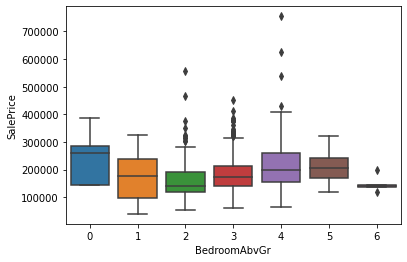

In [19]:
sns.boxplot(data = df_rl, x = "BedroomAbvGr", y = "SalePrice")

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

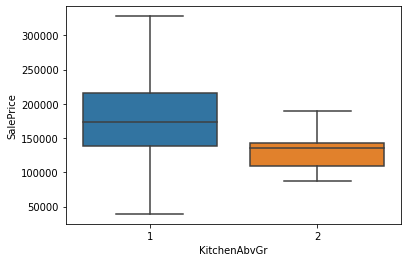

In [14]:
# complete this code to reveal the relationship b/w `KitchenAbvGr` and `SalePrice` with not outliers
sns.boxplot(data = df_rl, x = "KitchenAbvGr", y = "SalePrice", showfliers=False)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

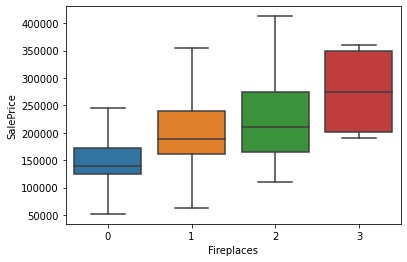

In [16]:
# complete this code to reveal the relationship b/w `Fireplaces` and `SalePrice` with not outliers
sns.boxplot(data = df_rl, x = "Fireplaces", y = "SalePrice", showfliers=False)

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

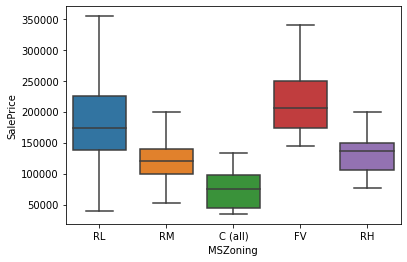

In [17]:
# write code to create a box-plot of zoning type & sale-price with no outliers from the original `df` dataframe
sns.boxplot(data = df, x = "MSZoning", y = "SalePrice", showfliers=False)

## Linear Regression - Cost Function

Mathematically speaking, how do we begin fitting a line of best-fit to this relationship? How do we find optimal betas?

Well, we look at our historical data. We call this our training set.

We feed this training set into our learning algorithm, which then gives us a hypothesis (model), which then we use to generate predictions. Our learning algorithm chooses optimal parameters for us.

We accomplish this by minimizing  the cost-function (a function that calculates the error of our prediction).

There is a gradient to our cost-function. Using calculus, we minimize the cost by following the gradient until we hit a *saddle* or minimum point in our search-space.

When we find optimal cost-value, we stop and return the coefficients of our independent variables to create a model that represents the trend between year-built and sale-price.

## R2 Value

The R2 value in statistics describes:
* The proportion (0 to 1) of variance in the independent variable described by the variance in the dependent variable.

 * In other words: how much of the the behavior of the independent variables affect the dependent variable (What proportion of price is determined by changes in year-built?)

In [20]:
from sklearn.linear_model import LinearRegression

# create model
lin = LinearRegression()

# if we have one variable, we msut reshape data
train = df_rl["YearBuilt"].to_numpy().reshape(-1, 1)

lin.fit(train, df_rl["SalePrice"])

LinearRegression()

In [21]:
lin.score(train, df_rl["SalePrice"])

0.2651906360658566

In [7]:
lin.coef_

array([1417.99410014])

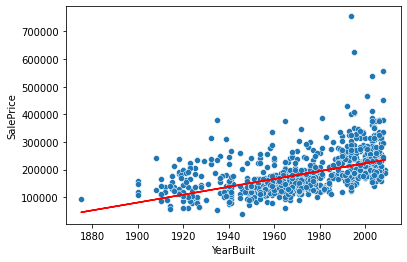

In [17]:
predictions = lin.predict(train)

sns.scatterplot(data = df_rl, x = "YearBuilt", y = "SalePrice")

plt.plot(df_rl["YearBuilt"], predictions, color='r')
plt.show()

In [22]:
# complete this code to create a linear regression model for the `YearRemodAdd` column only

from sklearn.linear_model import LinearRegression

# create model
lin = LinearRegression()

# if we have one variable, we msut reshape data
train = df_rl["YearRemodAdd"].to_numpy().reshape(-1, 1)

lin.fit(train, df_rl["SalePrice"])

lin.score(train, df_rl["SalePrice"])

0.23966594205024327

In [ ]:
# complete this code to create a linear regression model for the `YearRemodAdd` column for high-residential property `RH` of normal sale condition

# filter low-residential normal sale houses
df_rh = df[(df["MSZoning"] == "") & ]

from sklearn.linear_model import LinearRegression

# create model
lin = LinearRegression()

# if we have one variable, we msut reshape data
train = 

lin.fit()

lin.score()

In [28]:
## very rarely will we only use one column

train = df_rl[["YearBuilt", "YearRemodAdd", "LotArea"]].to_numpy()
lin.fit(train, df_rl["SalePrice"])
lin.score(train, df_rl["SalePrice"])

0.38829608376693703

## Data Stories

The data “story” comes after the completion of your ETL pipeline & data analysis.

Our story is simply a presentation that represents :
* background information: why did you choose this route for analysis? What makes this dataset interesting?
* our methodology: what tools did you use?
* the trends or patterns we found: what inferential or predictive insights did you find?
* next-actions, actionable insight:  what do we do with this information?

Things to consider :
* Audience perspective : If experts, spend more time discussing methodology & technical terms. If uninformed audience, focus on big picture.
* Narrative structure : Try to captivate attention
* Objectivit : Remove personal bias.
* Visualizations : Ensure data visualizations are more useful than “pretty”
